In [1]:
import urllib.request as url
import json
import pandas as pd

In [2]:
res = url.urlopen('https://api.covid19india.org/states_daily.json')
data = json.load(res)

In [3]:
states = data['states_daily']

In [7]:
df = pd.DataFrame(states)

In [8]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [9]:
df['date']

0       14-Mar-20
1       14-Mar-20
2       14-Mar-20
3       15-Mar-20
4       15-Mar-20
          ...    
1063    03-Mar-21
1064    03-Mar-21
1065    04-Mar-21
1066    04-Mar-21
1067    04-Mar-21
Name: date, Length: 1068, dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date']

0      2020-03-14
1      2020-03-14
2      2020-03-14
3      2020-03-15
4      2020-03-15
          ...    
1063   2021-03-03
1064   2021-03-03
1065   2021-03-04
1066   2021-03-04
1067   2021-03-04
Name: date, Length: 1068, dtype: datetime64[ns]

In [13]:
df['tt'][0]

'81'

In [14]:
df['tt'] = df['tt'].astype('int64')
df['mh'] = df['mh'].astype('int64')
df['up'] = df['up'].astype('int64')
df['dl'] = df['dl'].astype('int64')
df['rj'] = df['rj'].astype('int64')

In [15]:
df.groupby('status')

In [17]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [19]:
import matplotlib.pyplot as plt

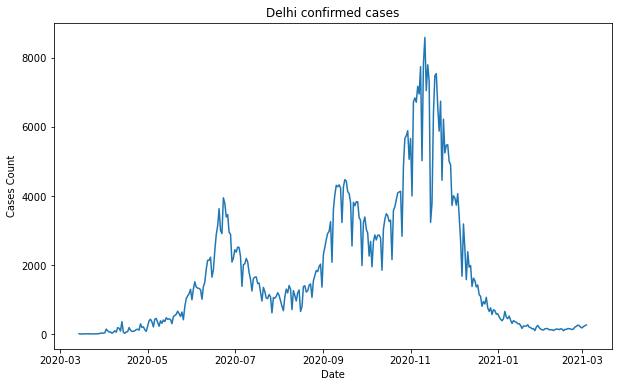

In [21]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['date'], confirmed_df['dl'])
plt.title('Delhi confirmed cases')
plt.xlabel('Date')
plt.ylabel('Cases Count')
plt.show()

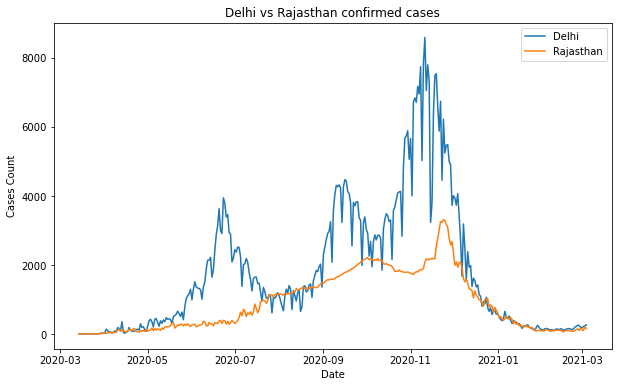

In [25]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['date'], confirmed_df['dl'], label='Delhi')
plt.plot(confirmed_df['date'], confirmed_df['rj'], label='Rajasthan')
plt.title('Delhi vs Rajasthan confirmed cases')
plt.xlabel('Date')
plt.ylabel('Cases Count')
plt.legend()
plt.show()

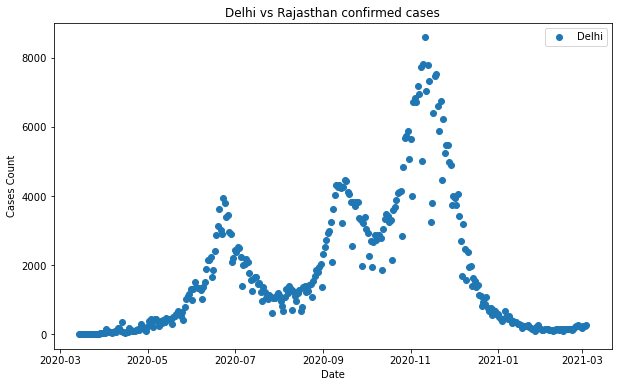

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed_df['date'], confirmed_df['dl'], label='Delhi')
plt.title('Delhi vs Rajasthan confirmed cases')
plt.xlabel('Date')
plt.ylabel('Cases Count')
plt.legend()
plt.show()

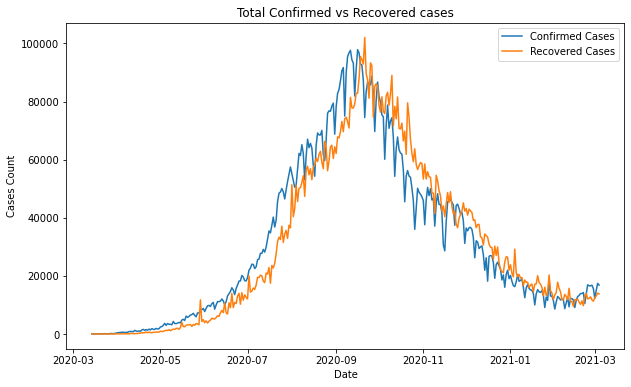

In [30]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['date'], confirmed_df['tt'], label='Confirmed Cases')
plt.plot(recovered_df['date'], recovered_df['tt'], label='Recovered Cases')
plt.title('Total Confirmed vs Recovered cases')
plt.xlabel('Date')
plt.ylabel('Cases Count')
plt.legend()
plt.show()

In [31]:
confirmed_df['month'] = pd.to_datetime(confirmed_df['date']).dt.month
confirmed_df['year'] = pd.to_datetime(confirmed_df['date']).dt.year
confirmed_df['week'] = pd.to_datetime(confirmed_df['date']).dt.week

<ipython-input-31-9c94b3ae2f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_df['month'] = pd.to_datetime(confirmed_df['date']).dt.month
<ipython-input-31-9c94b3ae2f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_df['year'] = pd.to_datetime(confirmed_df['date']).dt.year
<ipython-input-31-9c94b3ae2f69>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  confirmed_df['week'] = pd.to_datetime(confirmed_

In [32]:
confirmed_df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,tn,tr,tt,un,up,ut,wb,month,year,week
0,0,1,0,0,0,0,0,2020-03-14,2020-03-14,0,...,1,0,81,0,12,0,0,3,2020,11
3,0,0,0,0,0,0,0,2020-03-15,2020-03-15,0,...,0,0,27,0,1,0,0,3,2020,11
6,0,0,0,0,0,0,0,2020-03-16,2020-03-16,0,...,0,0,15,0,0,1,0,3,2020,12
9,0,0,0,0,0,0,0,2020-03-17,2020-03-17,0,...,0,0,11,0,2,0,1,3,2020,12
12,0,0,0,0,0,0,0,2020-03-18,2020-03-18,0,...,1,0,37,0,2,1,0,3,2020,12


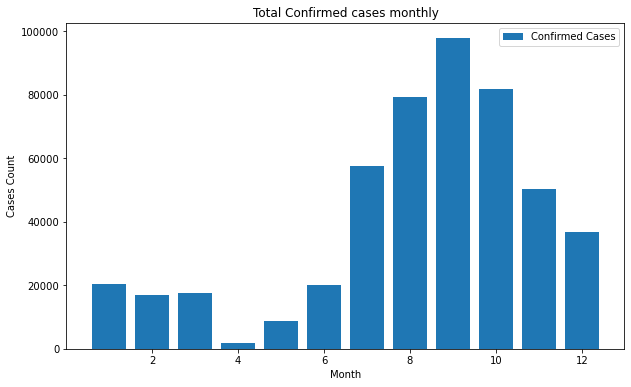

In [35]:
plt.figure(figsize=(10,6))
plt.bar(confirmed_df['month'], confirmed_df['tt'], label='Confirmed Cases')
plt.title('Total Confirmed cases monthly')
plt.xlabel('Month')
plt.ylabel('Cases Count')
plt.legend()
plt.show()